## Imports

Imports every library needed

In [1]:
#general imports
import pandas as pd
import numpy as np

#statsmodels for regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

#scipy for testing
from scipy import stats

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## Importing the Bike Data

Imports the normal Data needed for every KPI

In [2]:
df_bikes = pd.read_csv('../data/philadelphia_2017.csv')

df_bikes["start_time"] = pd.to_datetime(df_bikes["start_time"], dayfirst = True)

df_bikes["end_time"] = pd.to_datetime(df_bikes["end_time"], dayfirst = True)

df_bikes['ride_duration_minutes'] = df_bikes['end_time'] - df_bikes['start_time']

ride_lengths = []

for label, content in df_bikes.iterrows():
    ride_lengths.append(content["ride_duration_minutes"])

ride_lengths_np = np.array(ride_lengths)
iqr = stats.iqr(ride_lengths_np)

q1,q3 = np.percentile(ride_lengths_np, [25,99.9])

upper_range = q3 + (1.5*iqr)

df_bikes.drop(df_bikes[ (df_bikes.ride_duration_minutes > upper_range) | (df_bikes.end_time > pd.to_datetime("2017-12-31 23:59:59")) | (df_bikes.start_time > pd.to_datetime("2017-12-31 23:59:59")) | (df_bikes.ride_duration_minutes < pd.to_timedelta(0))].index , inplace=True)

In [3]:
df_weather = pd.read_csv('../data/weather_hourly_philadelphia.csv')

Change type of "date_time" to datetime

In [4]:
df_weather["date_time"] = pd.to_datetime(df_weather["date_time"])

Ordered weather data by date

In [5]:
df_weather = df_weather.sort_values(by=['date_time'])

Deleted weather date which is not needed for Philadelphia 2017 (<2017 or >2017)

In [6]:
start2017 = datetime(2016, 12, 31, 23)
end2017 = datetime(2018, 1, 1)

df_2017weather = df_weather[(df_weather["date_time"] > start2017) & (df_weather["date_time"] < end2017)]
df_2017weather_unique = df_2017weather.drop_duplicates(subset='date_time')
df_2017weather_unique['Order'] = np.arange(len(df_2017weather_unique))
df_2017weather_unique = df_2017weather_unique.set_index('Order')

<ipython-input-6-92eb66279140>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017weather_unique['Order'] = np.arange(len(df_2017weather_unique))


Identify missing data and generate by using average data from former and following hour

In [7]:
for i in df_2017weather_unique.index:
    if i == 8231:
        pass
    elif (df_2017weather_unique['date_time'][i] - df_2017weather_unique['date_time'][i+1]) != (df_2017weather_unique['date_time'][1] - df_2017weather_unique['date_time'][2]):
        df_2017weather_support = {'date_time': (df_2017weather_unique['date_time'][i] + pd.DateOffset(hours=1)), 'max_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'min_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'precip': df_2017weather_unique['precip'][i]}
        df_2017weather_unique = df_2017weather_unique.append(df_2017weather_support, ignore_index=True)

New order by date, because we added new lines

In [8]:
df_2017weather_unique = df_2017weather_unique.sort_values(by=['date_time'])
df_2017weather_unique['Order'] = np.arange(len(df_2017weather_unique))
df_2017weather_unique = df_2017weather_unique.set_index('Order')

Running the same code again because one line is missing

In [9]:
for i in df_2017weather_unique.index:
    if i == 8758:
        pass
    elif (df_2017weather_unique['date_time'][i] - df_2017weather_unique['date_time'][i+1]) != (df_2017weather_unique['date_time'][1] - df_2017weather_unique['date_time'][2]):
        df_2017weather_support = {'date_time': (df_2017weather_unique['date_time'][i] + pd.DateOffset(hours=1)), 'max_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'min_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'precip': df_2017weather_unique['precip'][i]}
        df_2017weather_unique = df_2017weather_unique.append(df_2017weather_support, ignore_index=True)

New order by date, because we added new lines

In [10]:
df_2017weather_unique = df_2017weather_unique.sort_values(by=['date_time'])
df_2017weather_unique['Order'] = np.arange(len(df_2017weather_unique))
df_2017weather_unique = df_2017weather_unique.set_index('Order')
df_2017weather_unique.head()

,date_time,max_temp,min_temp,precip
Order,,,,
0,2017-01-01 00:00:00,6.1,6.1,0.0
1,2017-01-01 01:00:00,6.1,6.1,0.0
2,2017-01-01 02:00:00,6.7,6.7,0.0
3,2017-01-01 03:00:00,7.2,7.2,0.0
4,2017-01-01 04:00:00,7.8,7.8,0.0


Check if data is complete by checking time difference of following

In [11]:
for i in df_2017weather_unique.index:
    if i == 8759:
        pass
    elif (df_2017weather_unique['date_time'][i] - df_2017weather_unique['date_time'][i+1]) != (df_2017weather_unique['date_time'][1] - df_2017weather_unique['date_time'][2]):
        df_2017weather_support = {'date_time': (df_2017weather_unique['date_time'][i] + pd.DateOffset(hours=1)), 'max_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'min_temp': (df_2017weather_unique['max_temp'][i] + df_2017weather_unique['max_temp'][i+1])/2, 'precip': df_2017weather_unique['precip'][i]}
        df_2017weather_unique = df_2017weather_unique.append(df_2017weather_support, ignore_index=True)

def would_be_rounded_up(num):
    if round(num) == int(num) + 1:
        return True
    else:
        return False

def get_precip(start_time, end_time):
    return df_2017weather_unique["precip"][get_weather_df_row(start_time, end_time)]

def get_temperature(start_time, end_time):
    row = get_weather_df_row(start_time, end_time)
    return (df_2017weather_unique["min_temp"][row] + df_2017weather_unique["max_temp"][row])/2

def get_weather_df_row(start_time, end_time):
    duration_of_travel = end_time-start_time
    average_timestamp = end_time - datetime.fromisoformat("2017-01-01 00:00:00") - duration_of_travel/2
    weather_row = average_timestamp.total_seconds()/3600
    return int(weather_row)

df_bikes["temperature"] = df_bikes.apply(lambda x: get_temperature(x["start_time"], x["end_time"]), axis=1)
df_bikes["precip"] = df_bikes.apply(lambda x: get_precip(x["start_time"],x["end_time"]), axis=1)

In [12]:
df_bikes.tail(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip
788900,2017-12-31 22:56:00,2017-12-31 22:59:00,3045,3052,11870,Indego30,13th & Locust,9th & Locust,0 days 00:03:00,-10.0,0.0
788902,2017-12-31 23:05:00,2017-12-31 23:33:00,3070,3124,3708,Indego30,"Spring Garden Station, MFL",Race Street Pier,0 days 00:28:00,-10.0,0.0
788904,2017-12-31 23:18:00,2017-12-31 23:25:00,3033,3046,11933,Indego30,10th & Chestnut,2nd & Market,0 days 00:07:00,-10.0,0.0
788905,2017-12-31 23:39:00,2017-12-31 23:40:00,3163,3163,6725,Indego30,25th & Locust,25th & Locust,0 days 00:01:00,-10.0,0.0
788906,2017-12-31 23:41:00,2017-12-31 23:55:00,3163,3057,11864,Indego30,25th & Locust,Philadelphia Museum of Art,0 days 00:14:00,-10.0,0.0


In [13]:
df_2017weather_unique.tail(5)

,date_time,max_temp,min_temp,precip
Order,,,,
8755,2017-12-31 19:00:00,-8.9,-8.9,0.0
8756,2017-12-31 20:00:00,-8.9,-8.9,0.0
8757,2017-12-31 21:00:00,-9.4,-9.4,0.0
8758,2017-12-31 22:00:00,-10.0,-10.0,0.0
8759,2017-12-31 23:00:00,-10.0,-10.0,0.0


# Regressions

Now we are doing regressions

1. linear regression: amount of loan bikes for one entire day and if the day is weekday or not

For this we are creating a new dataframe to get the daily total amount of loan bikes

In [14]:
from datetime import timedelta

# array containing all dates of the year
start_2017 = datetime(2017, 1, 1)
add_day = timedelta(days = 1)

days_2017 = []

for i in range(0, 365):
    days_2017.append(start_2017)
    start_2017 += add_day

print(days_2017)

days = range(0, 365)
days_Series = pd.Series(days_2017, index=days)
days_Series

[datetime.datetime(2017, 1, 1, 0, 0), datetime.datetime(2017, 1, 2, 0, 0), datetime.datetime(2017, 1, 3, 0, 0), datetime.datetime(2017, 1, 4, 0, 0), datetime.datetime(2017, 1, 5, 0, 0), datetime.datetime(2017, 1, 6, 0, 0), datetime.datetime(2017, 1, 7, 0, 0), datetime.datetime(2017, 1, 8, 0, 0), datetime.datetime(2017, 1, 9, 0, 0), datetime.datetime(2017, 1, 10, 0, 0), datetime.datetime(2017, 1, 11, 0, 0), datetime.datetime(2017, 1, 12, 0, 0), datetime.datetime(2017, 1, 13, 0, 0), datetime.datetime(2017, 1, 14, 0, 0), datetime.datetime(2017, 1, 15, 0, 0), datetime.datetime(2017, 1, 16, 0, 0), datetime.datetime(2017, 1, 17, 0, 0), datetime.datetime(2017, 1, 18, 0, 0), datetime.datetime(2017, 1, 19, 0, 0), datetime.datetime(2017, 1, 20, 0, 0), datetime.datetime(2017, 1, 21, 0, 0), datetime.datetime(2017, 1, 22, 0, 0), datetime.datetime(2017, 1, 23, 0, 0), datetime.datetime(2017, 1, 24, 0, 0), datetime.datetime(2017, 1, 25, 0, 0), datetime.datetime(2017, 1, 26, 0, 0), datetime.datetime(20

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
         ...    
360   2017-12-27
361   2017-12-28
362   2017-12-29
363   2017-12-30
364   2017-12-31
Length: 365, dtype: datetime64[ns]

In [15]:
#checks whether the weekday is a day in the week(1) or in weekend(0)
def is_weekday(day):
    if day == 5 or day == 6:
        return 0
    else:
        return 1


#sums up all loans for one entire day in 2017
def loans_per_day(month, day):
    day_in_2017_start = datetime(2017, month, day, 0, 0)
    day_in_2017_end = datetime(2017, month, day, 23, 59)
    df_day_start = df_bikes[df_bikes["start_time"] >= day_in_2017_start]
    df_day_end = df_day_start[df_day_start["start_time"] <= day_in_2017_end]
    return len(df_day_end)


lin_reg_bikes_df = pd.DataFrame({'date': pd.concat([days_Series])},
                                index=range(0, 365),
                                columns=['date'])

lin_reg_bikes_df['weekday'] = lin_reg_bikes_df['date'].apply(lambda x: x.weekday())
lin_reg_bikes_df['is_weekday'] = lin_reg_bikes_df['weekday'].apply(lambda x: is_weekday(x))
lin_reg_bikes_df['loans'] = lin_reg_bikes_df['date'].apply(lambda x: loans_per_day(x.month, x.day))


lin_reg_bikes_df.tail()


,date,weekday,is_weekday,loans
360,2017-12-27,2,1,637
361,2017-12-28,3,1,566
362,2017-12-29,4,1,566
363,2017-12-30,5,0,204
364,2017-12-31,6,0,241


In [16]:
#sums up all rain hours for one entire day in 2017
def rain_hours(month, day):
    day_in_2017_start = datetime(2017, month, day, 0, 0)
    day_in_2017_end = datetime(2017, month, day, 23, 59)
    df_rain_day_start = df_2017weather_unique[df_2017weather_unique['date_time'] >= day_in_2017_start]
    df_rain_day_end = df_rain_day_start[df_rain_day_start['date_time'] <= day_in_2017_end]

    rain =  sum(1 for i in df_rain_day_end['precip'] if i == 1)

    return rain

#test
rain_hours(3, 7)

5

In [17]:
lin_reg_bikes_df['precip_hours'] = lin_reg_bikes_df['date'].apply(lambda x: rain_hours(x.month, x.day))
lin_reg_bikes_df.head()

,date,weekday,is_weekday,loans,precip_hours
0,2017-01-01,6,0,856,0
1,2017-01-02,0,1,1510,12
2,2017-01-03,1,1,1854,9
3,2017-01-04,2,1,0,2
4,2017-01-05,3,1,0,0


In [18]:
#lin_reg_bikes_df._set_value(3, 'loans', 100)
#lin_reg_bikes_df.head()


In [19]:
#fill the 0 value 'loans' rows for january, february and march in 2017

# Build the mean of the 2 previous and the 2 following weekdays (e. g. the missing day is a wednesday
# so calculate the loans based on the previous and following wednesday loans).
# If there are not enough previous or following days we calculate with the remaining data so that
# there are at least 2 days to orientate on.

def mean_loans_2_days(d):
    temp = (lin_reg_bikes_df.iloc[d+7]['loans'] + lin_reg_bikes_df.iloc[d+14]['loans']) /2
    return temp

def mean_loans_4_days(d):
    temp = (lin_reg_bikes_df.iloc[d-7]['loans'] + lin_reg_bikes_df.iloc[d-14]['loans'] + lin_reg_bikes_df.iloc[d+7]['loans'] + lin_reg_bikes_df.iloc[d+14]['loans']) /4
    return temp

# Fill the missing leans for january 4th-12th
# We start with the 12th because so we can use the following data. If we would start with 4th
# there would be more uncertainty because we habe no data for 2016 and no data till january 12th 2017.

lin_reg_bikes_df._set_value(11, 'loans', mean_loans_2_days(11))
lin_reg_bikes_df._set_value(10, 'loans', mean_loans_2_days(10))
lin_reg_bikes_df._set_value(9, 'loans', ((lin_reg_bikes_df.iloc[2]['loans'] + lin_reg_bikes_df.iloc[16]['loans'] + lin_reg_bikes_df.iloc[23]['loans']) /3))
lin_reg_bikes_df._set_value(8, 'loans', ((lin_reg_bikes_df.iloc[1]['loans'] + lin_reg_bikes_df.iloc[15]['loans'] + lin_reg_bikes_df.iloc[22]['loans']) /3))
lin_reg_bikes_df._set_value(7, 'loans', ((lin_reg_bikes_df.iloc[0]['loans'] + lin_reg_bikes_df.iloc[14]['loans'] + lin_reg_bikes_df.iloc[21]['loans']) /3))
lin_reg_bikes_df._set_value(6, 'loans', mean_loans_2_days(6))
lin_reg_bikes_df._set_value(5, 'loans', mean_loans_2_days(5))
lin_reg_bikes_df._set_value(4, 'loans', mean_loans_2_days(4))
lin_reg_bikes_df._set_value(3, 'loans', mean_loans_2_days(3))


# The same procedure for february 4th-12th
# For the first two days we have no data for the following week so we use the loans 7 and 14 days ago and 14
# days in the future. For the remaining missing loans data in february then we can use the 2 previous and 2
# following weekdays.

lin_reg_bikes_df._set_value(34, 'loans', ((lin_reg_bikes_df.iloc[20]['loans'] + lin_reg_bikes_df.iloc[27]['loans'] + lin_reg_bikes_df.iloc[48]['loans']) /3))
lin_reg_bikes_df._set_value(35, 'loans', ((lin_reg_bikes_df.iloc[21]['loans'] + lin_reg_bikes_df.iloc[42]['loans'] + lin_reg_bikes_df.iloc[49]['loans']) /3))
lin_reg_bikes_df._set_value(36, 'loans', mean_loans_4_days(36))
lin_reg_bikes_df._set_value(37, 'loans', mean_loans_4_days(37))
lin_reg_bikes_df._set_value(38, 'loans', mean_loans_4_days(38))
lin_reg_bikes_df._set_value(39, 'loans', mean_loans_4_days(39))
lin_reg_bikes_df._set_value(40, 'loans', mean_loans_4_days(40))
lin_reg_bikes_df._set_value(41, 'loans', mean_loans_4_days(41))
lin_reg_bikes_df._set_value(42, 'loans', mean_loans_4_days(42))


# Finally march 4th-12th. Executed as february.

lin_reg_bikes_df._set_value(62, 'loans', ((lin_reg_bikes_df.iloc[48]['loans'] + lin_reg_bikes_df.iloc[55]['loans'] + lin_reg_bikes_df.iloc[76]['loans']) /3))
lin_reg_bikes_df._set_value(63, 'loans', ((lin_reg_bikes_df.iloc[49]['loans'] + lin_reg_bikes_df.iloc[56]['loans'] + lin_reg_bikes_df.iloc[77]['loans']) /3))
lin_reg_bikes_df._set_value(64, 'loans', mean_loans_4_days(64))
lin_reg_bikes_df._set_value(65, 'loans', mean_loans_4_days(65))
lin_reg_bikes_df._set_value(66, 'loans', mean_loans_4_days(66))
lin_reg_bikes_df._set_value(67, 'loans', mean_loans_4_days(67))
lin_reg_bikes_df._set_value(68, 'loans', mean_loans_4_days(68))
lin_reg_bikes_df._set_value(69, 'loans', mean_loans_4_days(69))
lin_reg_bikes_df._set_value(70, 'loans', mean_loans_4_days(70))

#test
lin_reg_bikes_df.head(15)

,date,weekday,is_weekday,loans,precip_hours
0,2017-01-01,6,0,856,0
1,2017-01-02,0,1,1510,12
2,2017-01-03,1,1,1854,9
3,2017-01-04,2,1,1535,2
4,2017-01-05,3,1,1565,0
5,2017-01-06,4,1,1313,11
6,2017-01-07,5,0,913,9
7,2017-01-08,6,0,756,0
8,2017-01-09,0,1,1021,0
9,2017-01-10,1,1,1330,0


In [20]:
#calculates the mean temperature of all loans for one day
def mean_temperature_loans(month, day):
    day_in_2017_start = datetime(2017, month, day, 0, 0)
    day_in_2017_end = datetime(2017, month, day, 23, 59)
    df_day_start = df_bikes[df_bikes["start_time"] >= day_in_2017_start]
    df_day_end = df_day_start[df_day_start["start_time"] <= day_in_2017_end]

    temp = 0
    for index, row in df_day_end.iterrows():
        temp += row['temperature']

    if len(df_day_end) > 0:
        mean_temp = temp / len(df_day_end)
    else:
        mean_temp = 0

    return mean_temp

mean_temperature_loans(1, 3)

6.475404530744328

In [21]:
lin_reg_bikes_df['mean_temp'] = lin_reg_bikes_df['date'].apply(lambda x: mean_temperature_loans(x.month, x.day))

# test
lin_reg_bikes_df.head(20)

,date,weekday,is_weekday,loans,precip_hours,mean_temp
0,2017-01-01,6,0,856,0,7.438785
1,2017-01-02,0,1,1510,12,4.177185
2,2017-01-03,1,1,1854,9,6.475405
3,2017-01-04,2,1,1535,2,0.000000
4,2017-01-05,3,1,1565,0,0.000000
5,2017-01-06,4,1,1313,11,0.000000
6,2017-01-07,5,0,913,9,0.000000
7,2017-01-08,6,0,756,0,0.000000
8,2017-01-09,0,1,1021,0,0.000000
9,2017-01-10,1,1,1330,0,0.000000


In [22]:
#fill the 0 value rows for january, february and march in 2017

# start with the temperature - build the mean of the 3 previous and the 3 following days
# if there are not enough previous or following days we calculate with the remaining data so that there are at least 3 days to orientate

def mean_temp_3_days(d):
    temp = (lin_reg_bikes_df.iloc[d]['mean_temp'] + lin_reg_bikes_df.iloc[d+1]['mean_temp'] + lin_reg_bikes_df.iloc[d+2]['mean_temp']) /3
    return temp

def sum_temp_3_days(s):
    sum_temp = lin_reg_bikes_df.iloc[s]['mean_temp'] + lin_reg_bikes_df.iloc[s+1]['mean_temp'] + lin_reg_bikes_df.iloc[s+2]['mean_temp']
    return sum_temp

# fill the missing temperatures for january 4th - 12th

lin_reg_bikes_df._set_value(3, 'mean_temp', mean_temp_3_days(0))
lin_reg_bikes_df._set_value(11, 'mean_temp', mean_temp_3_days(12))
lin_reg_bikes_df._set_value(4, 'mean_temp', mean_temp_3_days(1))
lin_reg_bikes_df._set_value(10, 'mean_temp', mean_temp_3_days(11))
lin_reg_bikes_df._set_value(5, 'mean_temp', mean_temp_3_days(2))
lin_reg_bikes_df._set_value(9, 'mean_temp', mean_temp_3_days(10))

#now we also use the temperature of the 3rd following day and go on in this mode
lin_reg_bikes_df._set_value(6, 'mean_temp', ((sum_temp_3_days(3) + lin_reg_bikes_df.iloc[9]['mean_temp']) /4))
lin_reg_bikes_df._set_value(8, 'mean_temp', ((sum_temp_3_days(9) + lin_reg_bikes_df.iloc[5]['mean_temp'] + lin_reg_bikes_df.iloc[6]['mean_temp']) /5))
lin_reg_bikes_df._set_value(7, 'mean_temp', ((mean_temp_3_days(4) + mean_temp_3_days(8)) /2))


# now the same procedure for february 4th - 12th

lin_reg_bikes_df._set_value(34, 'mean_temp', mean_temp_3_days(31))
lin_reg_bikes_df._set_value(42, 'mean_temp', mean_temp_3_days(43))
lin_reg_bikes_df._set_value(35, 'mean_temp', mean_temp_3_days(32))
lin_reg_bikes_df._set_value(41, 'mean_temp', mean_temp_3_days(42))
lin_reg_bikes_df._set_value(36, 'mean_temp', mean_temp_3_days(33))
lin_reg_bikes_df._set_value(40, 'mean_temp', mean_temp_3_days(41))

lin_reg_bikes_df._set_value(37, 'mean_temp', ((sum_temp_3_days(34) + lin_reg_bikes_df.iloc[40]['mean_temp']) /4))
lin_reg_bikes_df._set_value(39, 'mean_temp', ((sum_temp_3_days(40) + lin_reg_bikes_df.iloc[36]['mean_temp'] + lin_reg_bikes_df.iloc[37]['mean_temp']) /5))
lin_reg_bikes_df._set_value(38, 'mean_temp', ((mean_temp_3_days(35) + mean_temp_3_days(39)) /2))


# finally temperature for march 4th - 12th

lin_reg_bikes_df._set_value(62, 'mean_temp', mean_temp_3_days(59))
lin_reg_bikes_df._set_value(70, 'mean_temp', mean_temp_3_days(71))
lin_reg_bikes_df._set_value(63, 'mean_temp', mean_temp_3_days(60))
lin_reg_bikes_df._set_value(69, 'mean_temp', mean_temp_3_days(70))
lin_reg_bikes_df._set_value(64, 'mean_temp', mean_temp_3_days(61))
lin_reg_bikes_df._set_value(68, 'mean_temp', mean_temp_3_days(69))

lin_reg_bikes_df._set_value(65, 'mean_temp', ((sum_temp_3_days(62) + lin_reg_bikes_df.iloc[68]['mean_temp']) /4))
lin_reg_bikes_df._set_value(67, 'mean_temp', ((sum_temp_3_days(68) + lin_reg_bikes_df.iloc[64]['mean_temp'] + lin_reg_bikes_df.iloc[65]['mean_temp']) /5))
lin_reg_bikes_df._set_value(66, 'mean_temp', ((mean_temp_3_days(63) + mean_temp_3_days(67)) /2))

#test
lin_reg_bikes_df.head(20)

,date,weekday,is_weekday,loans,precip_hours,mean_temp
0,2017-01-01,6,0,856,0,7.438785
1,2017-01-02,0,1,1510,12,4.177185
2,2017-01-03,1,1,1854,9,6.475405
3,2017-01-04,2,1,1535,2,6.030458
4,2017-01-05,3,1,1565,0,5.561016
5,2017-01-06,4,1,1313,11,6.022293
6,2017-01-07,5,0,913,9,6.114448
7,2017-01-08,6,0,756,0,5.941514
8,2017-01-09,0,1,1021,0,5.757298
9,2017-01-10,1,1,1330,0,6.844023


In [23]:
rec=smf.ols(formula='loans~is_weekday', data=lin_reg_bikes_df).fit()
print(rec.summary())

                            OLS Regression Results                            
Dep. Variable:                  loans   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     20.19
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           9.45e-06
Time:                        23:28:05   Log-Likelihood:                -3031.3
No. Observations:                 365   AIC:                             6067.
Df Residuals:                     363   BIC:                             6074.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1892.2571     95.741     19.764      0.0

In [24]:
from sklearn.linear_model import LinearRegression

#linear_model_bikes = LinearRegression(fit_intercept=True, normalize=False)

#linear_model_bikes.fit(lin_reg_bikes_df['is_weekday'].values.reshape((-1,1)), lin_reg_bikes_df['loans'])
#print(linear_model_bikes.coef_, linear_model_bikes.intercept_)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#MSE and RMSE
print("Mean Squared Error:",mean_squared_error(lin_reg_bikes_df['is_weekday'].values.reshape((-1,1)), lin_reg_bikes_df['loans']),"(Bikes)^2")
print("Root Mean Squared Error:",mean_squared_error(lin_reg_bikes_df['is_weekday'].values.reshape((-1,1)), lin_reg_bikes_df['loans'])**0.5,"Bikes")

Mean Squared Error: 6093440.863013699 (Bikes)^2
Root Mean Squared Error: 2468.4895914331296 Bikes


2. linear regression: amount of bike loans and precipitation


In [26]:
rec2=smf.ols(formula='loans~precip_hours', data=lin_reg_bikes_df).fit()
print(rec2.summary())

                            OLS Regression Results                            
Dep. Variable:                  loans   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     47.88
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           2.05e-11
Time:                        23:28:08   Log-Likelihood:                -3018.5
No. Observations:                 365   AIC:                             6041.
Df Residuals:                     363   BIC:                             6049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2448.4053     56.902     43.029   

In [27]:
print("Mean Squared Error:",mean_squared_error(lin_reg_bikes_df['precip_hours'].values.reshape((-1,1)), lin_reg_bikes_df['loans']),"(Bikes)^2")
print("Root Mean Squared Error:",mean_squared_error(lin_reg_bikes_df['precip_hours'].values.reshape((-1,1)), lin_reg_bikes_df['loans'])**0.5,"Bikes")

Mean Squared Error: 6090655.712328767 (Bikes)^2
Root Mean Squared Error: 2467.925386296913 Bikes


3. linear regression: duration of the biketrip and temperature

In [28]:
df_bikes['ride_duration_to_int_seconds'] = df_bikes['ride_duration_minutes'].apply(lambda x: (x.total_seconds()))
df_bikes.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,ride_duration_minutes,temperature,precip,ride_duration_to_int_seconds
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",0 days 00:11:00,6.1,0.0,660.0
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:36:00,6.1,0.0,2160.0
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:35:00,6.1,0.0,2100.0
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",0 days 00:12:00,6.1,0.0,720.0
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:08:00,6.1,0.0,480.0


In [29]:
#eher nicht so machen, sondern wie in der folgenden Zelle
linear_model_duration = LinearRegression(fit_intercept=True, normalize=False)

linear_model_duration.fit(df_bikes['temperature'].values.reshape((-1,1)), df_bikes['ride_duration_minutes']/3600)
print(linear_model_duration.coef_, linear_model_duration.intercept_)

[2297914.24325896] 293491010.75289893


In [30]:
rec3=smf.ols(formula='ride_duration_to_int_seconds~temperature', data=df_bikes).fit()
print(rec3.summary())

                                 OLS Regression Results                                 
Dep. Variable:     ride_duration_to_int_seconds   R-squared:                       0.001
Model:                                      OLS   Adj. R-squared:                  0.001
Method:                           Least Squares   F-statistic:                     408.8
Date:                          Mon, 19 Jul 2021   Prob (F-statistic):           7.23e-91
Time:                                  23:28:23   Log-Likelihood:            -7.4448e+06
No. Observations:                        788096   AIC:                         1.489e+07
Df Residuals:                            788094   BIC:                         1.489e+07
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

4. linear regression: amount of all loans for a day and mean temperature of all loans on that day

In [31]:
lin_reg_bikes_df.head()

,date,weekday,is_weekday,loans,precip_hours,mean_temp
0,2017-01-01,6,0,856,0,7.438785
1,2017-01-02,0,1,1510,12,4.177185
2,2017-01-03,1,1,1854,9,6.475405
3,2017-01-04,2,1,1535,2,6.030458
4,2017-01-05,3,1,1565,0,5.561016


In [32]:
rec4 = smf.ols(formula='loans~mean_temp', data=lin_reg_bikes_df).fit()
print(rec4.summary())

                            OLS Regression Results                            
Dep. Variable:                  loans   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     509.5
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           4.05e-71
Time:                        23:28:23   Log-Likelihood:                -2881.1
No. Observations:                 365   AIC:                             5766.
Df Residuals:                     363   BIC:                             5774.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1036.2048     63.834     16.233      0.0

In [33]:
print("Mean Squared Error:",mean_squared_error(lin_reg_bikes_df['mean_temp'].values.reshape((-1,1)), lin_reg_bikes_df['loans']),"(Bikes)^2")
print("Root Mean Squared Error:",mean_squared_error(lin_reg_bikes_df['mean_temp'].values.reshape((-1,1)), lin_reg_bikes_df['loans'])**0.5,"Bikes")

Mean Squared Error: 6016387.056750444 (Bikes)^2
Root Mean Squared Error: 2452.8324559069347 Bikes


5. linear regression: amount of all loans for a day and weekday

In [34]:
rec5=smf.ols(formula='loans~weekday', data=lin_reg_bikes_df).fit()
print(rec5.summary())

                            OLS Regression Results                            
Dep. Variable:                  loans   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     8.948
Date:                Mon, 19 Jul 2021   Prob (F-statistic):            0.00297
Time:                        23:28:23   Log-Likelihood:                -3036.7
No. Observations:                 365   AIC:                             6077.
Df Residuals:                     363   BIC:                             6085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2489.4151     94.030     26.475      0.0

In [35]:
print("Mean Squared Error:",mean_squared_error(lin_reg_bikes_df['weekday'].values.reshape((-1,1)), lin_reg_bikes_df['loans']),"(Bikes)^2")
print("Root Mean Squared Error:",mean_squared_error(lin_reg_bikes_df['weekday'].values.reshape((-1,1)), lin_reg_bikes_df['loans'])**0.5,"Bikes")

Mean Squared Error: 6083930.884931507 (Bikes)^2
Root Mean Squared Error: 2466.5625645686564 Bikes


Multiple linear Regression

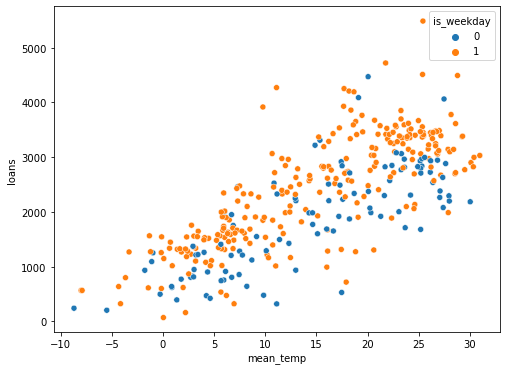

In [36]:
plt.figure(figsize = (8,6))

sns.scatterplot(x = lin_reg_bikes_df['mean_temp'], y = lin_reg_bikes_df['loans'],
                hue = lin_reg_bikes_df['is_weekday'])
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

X = lin_reg_bikes_df[['mean_temp', 'is_weekday']]
y = lin_reg_bikes_df[['loans']]
lin_mod_day = LinearRegression()
lin_mod_day.fit(X,y)
print(lin_mod_day.coef_, lin_mod_day.intercept_)

[[ 82.26218565 479.20952277]] [701.06231793]


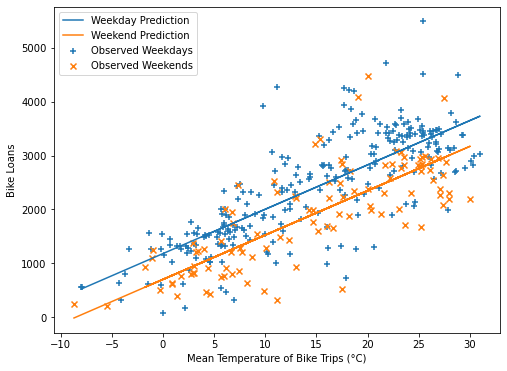

In [38]:
X_weekday = X[X['is_weekday']==1]
X_weekend = X[X['is_weekday']==0]

# predict weekends and weekdays seperately
y_pred_weekday = lin_mod_day.predict(X_weekday)
y_pred_weekend = lin_mod_day.predict(X_weekend)

plt.figure(figsize = (8,6))

plt.scatter(X_weekday['mean_temp'],
            lin_reg_bikes_df[lin_reg_bikes_df['is_weekday']==True]['loans'],
            marker="+", label='Observed Weekdays')

plt.scatter(X_weekend['mean_temp'],
            lin_reg_bikes_df[lin_reg_bikes_df['is_weekday']==False]['loans'],
            marker="x", label='Observed Weekends')

plt.plot(X_weekday['mean_temp'],
         y_pred_weekday,
         label='Weekday Prediction')
plt.plot(X_weekend['mean_temp'],
         y_pred_weekend,
         label='Weekend Prediction')

plt.xlabel('Mean Temperature of Bike Trips (°C)')
plt.ylabel('Bike Loans')

plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = lin_reg_bikes_df['loans']

#X_1d = lin_reg_bikes_df['mean_temp'].values.reshape((-1,1)) # need to reshape 1d vector
X_2d = lin_reg_bikes_df[['mean_temp','is_weekday']]

#y_pred_1d = lin_mod.predict(X_1d)
y_pred_2d = lin_mod_day.predict(X_2d)

# report test metrics

#print("MAE 1D:", mean_absolute_error(y_true,y_pred_1d))
print("MAE 2D:", mean_absolute_error(y_true,y_pred_2d))

#print("RMSE 1D:", mean_squared_error(y_true,y_pred_1d)**0.5)
print("RMSE 2D:", mean_squared_error(y_true,y_pred_2d)**0.5)

#print("R2 1D:", r2_score(y_true,y_pred_1d))
print("R2 2D:", r2_score(y_true,y_pred_2d))

MAE 2D: 445.4670694491027
RMSE 2D: 610.9990773625705
R2 2D: 0.6305330687097978


Finally the polynomial regression

The R^2 for quadratic curve is:  0.6090407767392905


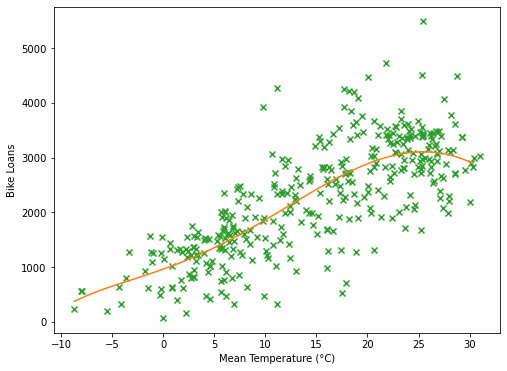

In [53]:
from sklearn.preprocessing import PolynomialFeatures

#def plot_regression_poly_scikit(X,Y,d):

X = lin_reg_bikes_df['mean_temp']
Y = lin_reg_bikes_df['loans']

# initialize PolynomialFeatures
poly_reg = PolynomialFeatures (degree = 5)

# Polynomial transformation
x_poly = poly_reg.fit_transform(X.values.reshape(-1,1))

# Fitting linear regression to polynomial features
lin_reg_Poly = LinearRegression()
lin_reg_Poly.fit(x_poly, Y)
model_pred = lin_reg_Poly.predict(x_poly)

# Plotting the regression line and the data (we have to transform the inputs as well!)
x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))

plt.figure(figsize = (8,6))
plt.scatter(X,Y,marker="x", c='C2')
ylim = plt.ylim()
plt.plot(x_fit,y_pred, c='C1')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Bike Loans")
plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
plt.ylim(ylim)
print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
#print(lin_reg_Poly.coef_)